#### Overview
* Bigdata Visualization

##### Reference Datashader
* https://datashader.org/getting_started/Introduction.html
* https://github.com/holoviz/datashader/tree/master/examples
* https://holoviz.org/tutorial/Large_Data.html

#### Import Libraries

In [1]:
import os
import datashader as ds
import colorcet as cc
import pandas as pd, numpy as np

#### Fetching Data

In [2]:
CCTV_CSV_PATH = os.path.join(
    os.getcwd(), '89_data', 'csv', 'road_cctv_info.csv'
)

cctv_df = pd.read_csv(CCTV_CSV_PATH, encoding='euc-kr')
cctv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관리기관명     50000 non-null  object 
 1   소재지도로명주소  30380 non-null  object 
 2   소재지지번주소   44295 non-null  object 
 3   설치목적구분    50000 non-null  object 
 4   카메라대수     50000 non-null  object 
 5   카메라화소수    44968 non-null  float64
 6   촬영방면정보    35413 non-null  object 
 7   보관일수      48250 non-null  float64
 8   설치연월      37622 non-null  object 
 9   관리기관전화번호  50000 non-null  object 
 10  위도        49580 non-null  float64
 11  경도        49585 non-null  float64
 12  데이터기준일자   50000 non-null  object 
 13  제공기관코드    50000 non-null  object 
 14  제공기관명     50000 non-null  object 
dtypes: float64(4), object(11)
memory usage: 5.7+ MB


#### Preprocessing Data

In [3]:
# 위경도 정보에서 Null인 레코드 삭제
cctv_df.dropna(subset=['위도', '경도'], inplace=True)

In [4]:
# 위도 정보가 잘못된 값 확인
cctv_df['위도'].astype(str).str[:2].value_counts()
# 결과에서 위도가 39보다 크거나 31보다 적으면 다 삭제함

위도
37    22590
35    16989
36     7179
34     1760
33      488
38      450
39        2
30        1
15        1
Name: count, dtype: int64

In [5]:
cctv_df = cctv_df[(cctv_df['위도'] < 39.0) & (cctv_df['위도'] > 31.0)]
cctv_df['위도'].astype(str).str[:2].value_counts()

위도
37    22590
35    16989
36     7179
34     1760
33      488
38      450
Name: count, dtype: int64

In [6]:
cctv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49456 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관리기관명     49456 non-null  object 
 1   소재지도로명주소  30061 non-null  object 
 2   소재지지번주소   43774 non-null  object 
 3   설치목적구분    49456 non-null  object 
 4   카메라대수     49456 non-null  object 
 5   카메라화소수    44431 non-null  float64
 6   촬영방면정보    35033 non-null  object 
 7   보관일수      47709 non-null  float64
 8   설치연월      37224 non-null  object 
 9   관리기관전화번호  49456 non-null  object 
 10  위도        49456 non-null  float64
 11  경도        49456 non-null  float64
 12  데이터기준일자   49456 non-null  object 
 13  제공기관코드    49456 non-null  object 
 14  제공기관명     49456 non-null  object 
dtypes: float64(4), object(11)
memory usage: 6.0+ MB


#### Display Map

In [7]:
cvs = ds.Canvas(plot_width=850, plot_height=500)
agg = cvs.points(cctv_df, '경도', '위도')
img = ds.tf.shade(agg, cmap=cc.fire, how='log')

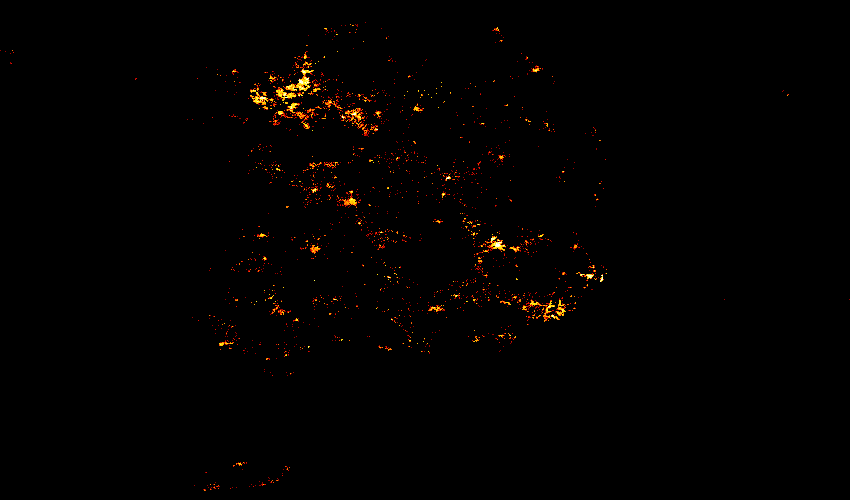

In [8]:
ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire), 'black')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
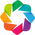

In [11]:
import holoviews as hv
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade

hv.extension('bokeh')

In [13]:
points = hv.Points(cctv_df, ['경도', '위도'])
points_shade = datashade(
    points, x_sampling=0.05, y_sampling=0.05, cmap=cc.fire, width=1200, height=800
)
points_shade

BokehModel(combine_events=True, render_bundle={'docs_json': {'3b67c18a-1103-4189-b2c8-fa0520d90eec': {'version…

In [14]:
cctv_df['x'], cctv_df['y'] = ds.utils.lnglat_to_meters(cctv_df.경도, cctv_df.위도)

In [15]:
map_tiles = hv.element.tiles.EsriImagery().opts(alpha=1, width=900, height=480, bgcolor='black')
points = hv.Points(cctv_df, ['x', 'y'])
points_shade = datashade(
    points, x_sampling=0.01, y_sampling=0.01, cmap=cc.fire, width=900, height=480
)

map_tiles * points_shade

BokehModel(combine_events=True, render_bundle={'docs_json': {'1b5b99af-24dd-4bbb-a6ee-79a4e60f105b': {'version…

In [18]:
# 대용량 데이터의 병렬/분산처리 지원
# (pandas는 단일CPU작업만 가능하고 모든 데이터를 메모리에 올리기 때문에 제한적임)
import dask.dataframe as dd
from copy import copy

In [23]:
cctv_ddf = dd.from_pandas(cctv_df, npartitions=1)

In [24]:
cctv_ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 17 entries, 관리기관명 to y
dtypes: object(11), float64(6)

In [25]:
cctv_ddf['x'], cctv_ddf['y'] = ds.utils.lnglat_to_meters(cctv_ddf.경도, cctv_ddf.위도)

In [26]:
cctv_ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 17 entries, 관리기관명 to y
dtypes: object(11), float64(6)

In [27]:
cctv_ddf.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치연월,관리기관전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명,x,y
0,경상남도 김해시청,NaN,경상남도 김해시 구산동 1072-19,생활방범,3,200.0,현대병원뒤,30.0,2019-11,055-330-4741,35.249247,128.871639,2019-06-26,5350000,경상남도 김해시,1.434593e+07,4.197805e+06
1,경상남도 김해시청,NaN,경상남도 김해시 구산동 305-15,생활방범,2,200.0,목화골공원,30.0,2019-12,055-330-4741,35.247411,128.873605,2019-06-26,5350000,경상남도 김해시,1.434614e+07,4.197554e+06
2,경상남도 김해시청,NaN,경상남도 김해시 삼계동 1484-14,생활방범,2,200.0,정원빌라,30.0,2019-06,055-330-4741,35.261728,128.874144,2019-06-26,5350000,경상남도 김해시,1.434620e+07,4.199506e+06
3,경상남도 김해시청,NaN,경상남도 김해시 구산동 1043,생활방범,4,200.0,최가아구찜,30.0,2019-05,055-330-4741,35.247076,128.872461,2019-06-26,5350000,경상남도 김해시,1.434602e+07,4.197509e+06
4,경상남도 김해시청,NaN,경상남도 김해시 구산동 175-10,생활방범,2,200.0,동호맨션,30.0,2019-12,055-330-4741,35.241185,128.877334,2019-06-26,5350000,경상남도 김해시,1.434656e+07,4.196706e+06


In [28]:
renderer = hv.renderer('bokeh')

In [29]:
map_tiles = hv.element.tiles.EsriImagery() \
    .opts(alpha=1, width=1500, height=880, bgcolor='black')
points_shade = datashade(
    points, x_sampling=0.1, y_sampling=0.1, cmap=cc.fire, width=900, height=480
)
map_tiles * points_shade

BokehModel(combine_events=True, render_bundle={'docs_json': {'0d23cb71-ed91-4618-9953-3fd0830ce5db': {'version…